In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats
from numpy import random
from numpy import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('subscribers.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    227628 non-null  int64  
 1   subid                         227628 non-null  int64  
 2   package_type                  192054 non-null  object 
 3   num_weekly_services_utilized  117178 non-null  float64
 4   preferred_genre               191302 non-null  object 
 5   intended_use                  224079 non-null  object 
 6   weekly_consumption_hour       189698 non-null  float64
 7   num_ideal_streaming_services  115458 non-null  float64
 8   age                           192459 non-null  float64
 9   male_TF                       227359 non-null  object 
 10  country                       227628 non-null  object 
 11  attribution_technical         227628 non-null  object 
 12  attribution_survey            224984 non-nul

In [32]:
df.describe()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,227628.000000,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,192724.000000,227628.000000,227628.000000
mean,341129.200041,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02,4.0,4.732049,4.512188,0.115145,13.989544,0.790122
std,197094.201084,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05,0.0,0.101049,0.097078,0.176971,0.382453,0.777713
min,1.000000,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00,4.0,0.807400,0.770700,-0.660600,0.000000,0.000000
25%,170766.250000,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01,4.0,4.734300,4.514100,0.036700,14.000000,0.000000
50%,340985.500000,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01,4.0,4.734300,4.514100,0.036700,14.000000,1.000000
75%,511844.000000,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01,4.0,4.734300,4.514100,0.110100,14.000000,1.000000
max,682885.000000,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07,4.0,5.101300,5.027900,0.734000,14.000000,3.000000


## customer segmentation

In [24]:

df1=df.drop(columns=['subid','initial_credit_card_declined','country','months_per_bill_period','monthly_price','discount_price','account_creation_date','trial_end_date','join_fee','language','payment_type','num_trial_days','payment_period','last_payment','next_payment','num_trial_days','cancel_date','Unnamed: 0'])
df1['age']=df1['age'].replace(0,np.nan)
df1 = df1.drop(df1[df1['age']>100].index)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 226740 entries, 0 to 227627
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  191345 non-null  object 
 1   num_weekly_services_utilized  116762 non-null  float64
 2   preferred_genre               190599 non-null  object 
 3   intended_use                  223204 non-null  object 
 4   weekly_consumption_hour       188816 non-null  float64
 5   num_ideal_streaming_services  115046 non-null  float64
 6   age                           191507 non-null  float64
 7   male_TF                       226471 non-null  object 
 8   attribution_technical         226740 non-null  object 
 9   attribution_survey            224103 non-null  object 
 10  op_sys                        213486 non-null  object 
 11  plan_type                     226740 non-null  object 
 12  current_sub_TF                226740 non-nul

In [25]:

df1.dropna(inplace=True)
df1


,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,current_sub_TF,trial_completed,churn
2,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,facebook,iOS,base_uae_14_day_trial,False,True,1
4,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,youtube,iOS,base_uae_14_day_trial,True,True,0
6,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,search,Android,base_uae_14_day_trial,True,True,0
7,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,email,referral,iOS,base_uae_14_day_trial,True,True,0
9,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,False,search,facebook,Android,base_uae_14_day_trial,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,base,4.0,drama,access to exclusive content,27.301448,2.0,44.0,False,email,facebook,iOS,base_uae_14_day_trial,True,True,0
227619,base,3.0,comedy,access to exclusive content,30.201361,2.0,32.0,False,email,facebook,Android,base_uae_14_day_trial,True,True,0
227622,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,email,pinterest,iOS,base_uae_14_day_trial,True,True,0
227623,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,facebook_organic,iOS,base_uae_14_day_trial,True,True,0


In [26]:
df1_dummy = pd.get_dummies(data=df1, columns=['package_type', 'preferred_genre',
                                                    'intended_use', 'male_TF', 
                                                    'attribution_technical','attribution_survey','op_sys',
                                                   'plan_type','trial_completed','current_sub_TF'])
df1_dummy

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,churn,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,trial_completed_False,trial_completed_True,current_sub_TF_False,current_sub_TF_True
2,3.0,36.001186,2.0,25.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
4,4.0,22.951579,3.0,28.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1
6,2.0,20.051667,2.0,61.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
7,3.0,34.551230,2.0,23.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
9,3.0,28.751405,2.0,71.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227616,4.0,27.301448,2.0,44.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
227619,3.0,30.201361,2.0,32.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
227622,2.0,24.401536,2.0,43.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1

In [27]:
df1_dummy.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))


,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,churn,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_False,male_TF_True,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,trial_completed_False,trial_completed_True,current_sub_TF_False,current_sub_TF_True
2,0.214286,0.626667,0.285714,0.085366,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.285714,0.506667,0.428571,0.121951,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.142857,0.480000,0.285714,0.524390,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.214286,0.613333,0.285714,0.060976,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.214286,0.560000,0.285714,0.646341,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

{1: 19200766.985867295, 2: 7688816.322019826, 3: 5167998.02981582, 4: 4131839.8204258694, 5: 3628908.0102466396, 6: 3183588.860239303, 7: 2820769.8837069, 8: 2576653.8757930566, 9: 2373152.7963663726, 10: 2200286.77367834, 11: 2075424.8421656315, 12: 1965637.900839614, 13: 1874598.945560464, 14: 1772959.5218383018, 15: 1687271.4806092784, 16: 1628124.3494611373, 17: 1574072.1154234323, 18: 1514832.4278545168, 19: 1472925.3105175337}


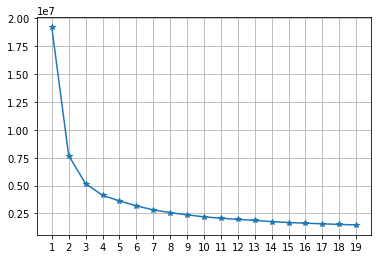

In [28]:

inertias = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(df1_dummy)
    inertias[k] = kmeans.inertia_
print(inertias)


ax = plt.subplot()
ax.plot(list(inertias.keys()), list(inertias.values()), '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [29]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(df1_dummy)
y_pred = list(y_pred)


In [35]:
df1['cluster'] = y_pred
df1.to_csv('customer_cluster_result.csv',index=False)


In [31]:
df1.groupby('cluster').count()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,current_sub_TF,trial_completed,churn
cluster,,,,,,,,,,,,,,,
0,36355,36355,36355,36355,36355,36355,36355,36355,36355,36355,36355,36355,36355,36355,36355
1,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089
2,30899,30899,30899,30899,30899,30899,30899,30899,30899,30899,30899,30899,30899,30899,30899


## Churn Model

In [3]:
df2 = df
df2['churn'] = ''

pd.set_option('display.max_columns',None)
df2

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True,
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True,
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,2020-01-31 23:58:51,False,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True,


In [4]:
conditions=[(df2.current_sub_TF == False)&(df2.payment_period==0),
            (df2.current_sub_TF == True)&(df2.payment_period==0)&( df2['cancel_date'].isnull()==False),
            (df2.payment_period>0),
            (df2.current_sub_TF == True)&(df2.payment_period==0)&( df2['cancel_date'].isnull()==True)]
values = [True,True,False,False]
df2['churn'] = np.select(conditions,values)
df2

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,0
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,0
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True,1
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,0
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,0
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,0
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,2020-01-31 23:58:51,False,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True,0


In [5]:
df1_part=df.drop(columns=['initial_credit_card_declined','country','months_per_bill_period','monthly_price',
                          'discount_price','account_creation_date','trial_end_date','join_fee','language','payment_type',
                          'num_trial_days','payment_period','last_payment','next_payment','num_trial_days','cancel_date','Unnamed: 0'
                         ,'trial_end_date'])
df2_part=df2.iloc[:,[1,16,17,21,31]]
df_churn = pd.merge(df1_part, df2_part, on='subid', how='left')
df_churn.info()

df_churn

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 0 to 227627
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192459 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   attribution_technical         227628 non-null  object 
 10  attribution_survey            224984 non-null  object 
 11  op_sys                        214253 non-null  object 
 12  plan_type                     227628 non-nul

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,current_sub_TF,trial_completed,churn_x,monthly_price,discount_price,join_fee,churn_y
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,facebook,Android,base_uae_14_day_trial,True,True,0,4.7343,4.5141,NaN,0
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,facebook,NaN,base_uae_14_day_trial,True,True,0,4.7343,4.5141,0.3303,0
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,facebook,iOS,base_uae_14_day_trial,False,True,1,4.7343,4.5141,0.1101,1
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,tv,Android,base_uae_14_day_trial,False,True,1,4.7343,4.5141,0.0367,1
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,youtube,iOS,base_uae_14_day_trial,True,True,0,4.7343,4.5141,0.0367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,facebook,facebook_organic,iOS,base_uae_14_day_trial,True,True,0,4.7343,4.5141,0.3303,0
227624,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,google_organic,referral,iOS,base_uae_14_day_trial,True,True,0,4.7343,4.5141,0.3303,0
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,facebook,facebook,iOS,base_uae_14_day_trial,True,True,0,4.7343,4.5141,0.0367,0
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,facebook,iOS,base_uae_14_day_trial,True,True,0,4.7343,4.5141,NaN,0


In [6]:
df_churn = pd.get_dummies(data=df_churn, columns=['package_type', 'preferred_genre',
                                                    'intended_use', 'plan_type', 
                                                    'attribution_technical','attribution_survey','op_sys'])
df_churn


,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,current_sub_TF,trial_completed,churn_x,monthly_price,discount_price,join_fee,churn_y,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_base_uae_no_trial_7_day_guarantee,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_eur_no_trial,plan_type_low_gbp_14_day_trial,plan_type_low_sar_no_trial,plan_type_low_uae_no_trial,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS
0,21724479,NaN,NaN,NaN,NaN,False,True,True,0,4.7343,4.5141,NaN,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,23383224,NaN,22.951579,NaN,70.0,False,True,True,0,4.7343,4.5141,0.3303,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26844789,3.0,36.001186,2.0,25.0,True,False,True,1,4.7343,4.5141,0.1101,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,29417030,NaN,20.051667,NaN,30.0,False,False,True,1,4.7343,4.5141,0.0367,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,26723159,4.0,22.951579,3.0,28.0,False,True,True,0,4.7343,4.5141,0.0367,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,3.0,28.751405

In [12]:
df_churn=df_churn.dropna()

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df_churn.drop(columns=['churn_x','churn_y'])
y = df_churn['churn_x']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)


In [14]:
X_train

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,current_sub_TF,trial_completed,monthly_price,discount_price,join_fee,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_base_uae_no_trial_7_day_guarantee,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_eur_no_trial,plan_type_low_gbp_14_day_trial,plan_type_low_sar_no_trial,plan_type_low_uae_no_trial,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_Android,op_sys_iOS
186282,25579239,3.0,37.451142,2.0,62.0,True,True,True,4.7343,4.5141,0.6606,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
67465,24845890,3.0,41.801011,2.0,36.0,True,True,True,4.7343,4.5141,0.0367,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
56206,26594417,3.0,27.301448,2.0,41.0,False,True,True,4.7343,4.5141,0.3303,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
178351,23568431,3.0,27.301448,2.0,45.0,False,True,True,4.7343,4.5141,0.0000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
165925,21471990,4.0,27.301448,2.0,34.0,False,True,True,4.7343,4.5141,0.3303,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9617,27423756,2.0,27.301448,2.0,23.0,False,

In [37]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
score= accuracy_score(y_test, y_pred)



AUC: 0.959737086466339


In [38]:
print("Accuracy:",score)
print("AUC:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.9517919075144509
AUC: 0.959737086466339


In [19]:
predictions_proba=clf.predict_proba(X)
predictions_proba[:,1]

df_churn['prob'] = predictions_proba[:,1]

<ipython-input-19-86c2b455dda0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['prob'] = predictions_proba[:,1]


In [20]:
df_churn.to_csv('churn.csv')